![MLU Logo](../data/MLU_Logo.png)

# Assignment 1

Welcome to DTE!  These assignments are designed to give you practice on the practical implementation of decision trees.

## Related Reading
If you want to read more about these concepts, I'll be putting links here for you to find verious resources.  Many of them will be from our book [Understanding Random Forests](https://arxiv.org/pdf/1407.7502).
* [Understanding Random Forests](https://arxiv.org/pdf/1407.7502) Chapter 3. *Decision Trees*

## This Assignment's Goals
We have a couple of things to do this week:
* First, we want to see how decision trees behave
* Second, we want to get familiar with the dataset we will work with throughout this class.

In [1]:
! pip install -q -r ../requirements.txt

## Question1 - Fit Decision Tree Classifier

Fit a decision tree classifier on your training dataset below.

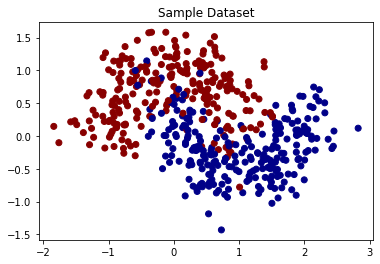

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons

dataset = make_moons(500, noise=0.3, random_state=0x1701a)

X, y = dataset
plt.scatter(X[:, 0], X[:, 1], cmap = ListedColormap(['#880000', '#000088']), c=y)
plt.title("Sample Dataset")

training_data = X[:400], y[:400]
validation_data = X[400:], y[400:]

Use the validation data to find the optimum max_depth of your tree. You can use __accuracy score__ on validation dataset.

In [3]:
### Code for Question 1 ###

# Write Question 1 Here. #

## Question2 - Final Project:
You will work with pet adoption data from Austin Animal Center. We joined two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). We want you to predict whether a pet is adopted within the 30 days stay time in the animal center.

Let's look at the fields in this dataset:
* Pet ID - Unique ID of pet
* Outcome Type - State of pet at the time of recording the outcome
* Sex upon Outcome - Sex of pet at outcome
* Name - Name of pet 
* Found Location - Found location of pet before entered the center
* Intake Type - Circumstances bringing the pet to the center
* Intake Condition - Health condition of pet when entered the center
* Pet Type - Type of pet
* Sex upon Intake - Sex of pet when entered the center
* Breed - Breed of pet 
* Color - Color of pet 
* Age upon Intake Days - Age of pet when entered the center (days)
* Time at Center - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict.

Let's read our dataset using the Pandas library. This will load the data into a data frame, it acts like a data table.

In [4]:
import pandas as pd

df = pd.read_csv("../data/final_project/training.csv")

# Display first 10 rows
df.head(10)

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
0,A745079,Transfer,Unknown,NaN,7920 Old Lockhart in Travis (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Blue,3,0
1,A801765,Transfer,Intact Female,NaN,5006 Table Top in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby/White,28,0
2,A667965,Transfer,Neutered Male,NaN,14100 Thermal Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair Mix,Brown/Tan,1825,0
3,A687551,Transfer,Intact Male,NaN,5811 Cedardale Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,28,0
4,A773004,Adoption,Neutered Male,*Boris,Highway 290 And Arterial A in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tricolor/Cream,365,0
5,A750059,Transfer,Neutered Male,*Joshua,William Cannon And Jones in Austin (TX),Stray,Normal,Dog,Neutered Male,Great Pyrenees/Border Collie,Black/White,730,0
6,A665653,Transfer,Intact Male,NaN,2900 Sunridge Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby/White,30,0
7,A777411,Adoption,Neutered Male,*Fuzzinator,2802 Monero in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,60,0
8,A708637,Transfer,Intact Female,NaN,1101 1/2 Tillery Street in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Torbie,730,0
9,A747638,Adoption,Neutered Male,*Remington,Hornsby St And W Caddo St in Austin (TX),Stray,Normal,Dog,Intact Male,Anatol Shepherd,Black/Tan,730,0


We didn't do any data cleaning for you, so you'll need to spend a bit of time doing that in order to get the dataset ready to start investigating.

In [5]:
# Test data
test_df = pd.read_csv("../data/final_project/test_features.csv")

test_df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


In [6]:
### Code for Question 2 ###

# Write Question 2 Here. #